

```
# This is formatted as code
```

#AI2 PROJECT-1


#LOADING DATA

In [1]:
import pandas as pd

In [2]:
train_set = pd.read_csv("vaccine_train_set.csv") #read train data set
train_tweet = train_set['tweet']
train_label = train_set['label']

In [3]:
validation_set = pd.read_csv("vaccine_validation_set.csv") #read validation data set
validation_tweet = validation_set['tweet']
validation_label = validation_set['label']

Data exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


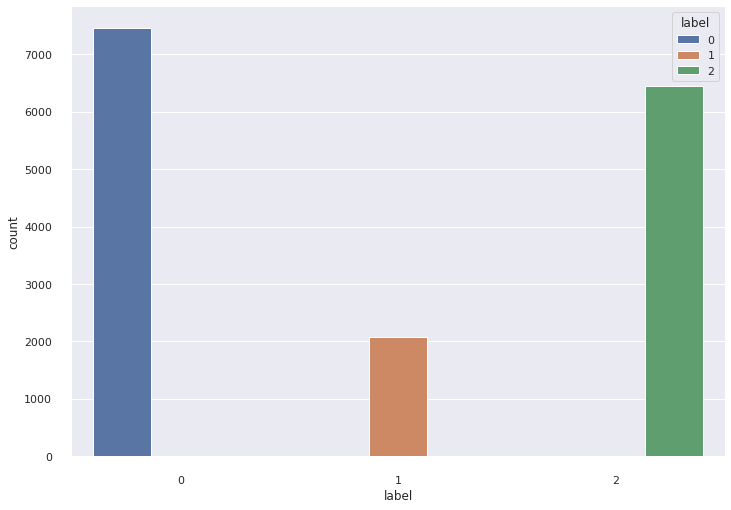

In [4]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('label',data=train_set,hue = 'label')
sns.despine(offset=10, trim=True)

In [5]:
train_set

,Unnamed: 0,tweet,label
0,0,Sip N Shop Come thru right now #Marjais #Popul...,0
1,1,I don't know about you but My family and I wil...,1
2,2,@MSignorile Immunizations should be mandatory....,2
3,3,President Obama spoke in favor of vaccination ...,0
4,4,"""@myfoxla: Arizona monitoring hundreds for mea...",0
...,...,...,...
15971,15971,@Salon if u believe the anti-vax nutcases caus...,1
15972,15972,How do you feel about parents who don't #vacci...,0
15973,15973,70 Preschoolers Tested for Measles in Simi Val...,0
15974,15974,Finance Minister: Budget offers room to procur...,0


# PREPROCESSING

In [6]:
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
 
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    t = tweet.lower() #convert to lower case
    t = re.sub("'", "", t) # to avoid removing contractions in english
    t = re.sub("@[A-Za-z0-9_]+","", t) #removes tags
    t = re.sub("#[A-Za-z0-9_]+","", t) #removes hashtags
    t = re.sub(r'http\S+', '', t) #remove links
    t = re.sub('[()!?]', ' ', t)  #remove punctuation
    t = re.sub('\[.*?\]',' ', t)
    t = re.sub("[^a-z0-9]"," ", t) #remove numbers
    t = t.split() #splits the tweet to individual words
    t = [w for w in t if not w in stopwords] #remove stopwords
    t = " ".join(word for word in t)
    return t

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
filtered_train_tweets = [clean_tweet(tw) for tw in train_tweet]

# VECTORIZATION

BOW

In [8]:
from sklearn import *
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.007)
bow_trainset = bow_vectorizer.fit_transform(filtered_train_tweets) #apply BOW on training tweets
bow_validationset = bow_vectorizer.transform(validation_tweet) #apply BOW on validation tweets

TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0.007) 
tfidf_trainset = tfidf_vectorizer.fit_transform(filtered_train_tweets)
tfidf_validationset = tfidf_vectorizer.transform(validation_tweet)

# TRAINING & LEARNING CURVES

Defining the model

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, C=0.06) #define model

15976

Ploting leraning curves

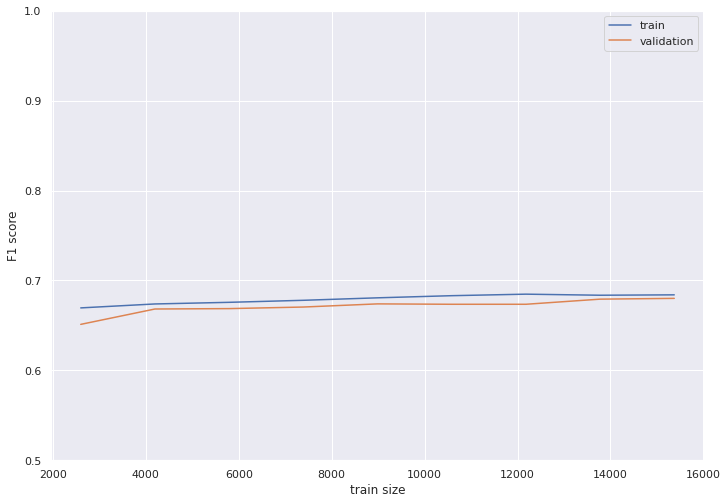

In [31]:
from sklearn.metrics import f1_score
import matplotlib as plt
from matplotlib import pyplot

size=bow_trainset.shape[0]
x = range(1, 10, 1)
scores_train = [] #array to store the scores of training data for diferent train data sizes
scores_validation = [] #array to store the scores of validation data for diferent train data sizes
size_train = [] #utility array for x axis 
train_size = 1000
#train and score measuring for diferent sizes of train data

for i in x:
  train_size = int(train_size + size*0.1)
  # train_size = i*1000
  size_train.append(train_size)

  model = model.fit(X=bow_trainset[:train_size], y=train_label[:train_size])
  prediction_validation = model.predict(bow_validationset)

  prediction_train = model.predict(bow_trainset)

  scores_validation.append(f1_score(validation_label, prediction_validation, average='micro'))
  scores_train.append(f1_score(train_label, prediction_train, average='micro'))

#plot
pyplot.ylim([0.5, 1])
pyplot.xlabel('train size')
pyplot.ylabel('F1 score')
pyplot.plot(size_train,scores_train, label='train')
pyplot.plot(size_train,scores_validation, label= 'validation')
pyplot.legend()

#TRAINING
with the parameters that worked best after experimenting

In [35]:
model = model.fit(X=bow_trainset, y=train_label)
prediction = model.predict(bow_validationset)

#STATISTICS

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("PRECISSION SCORE=",precision_score(validation_label, prediction, average='weighted'))
print("RECALL SCORE=",recall_score(validation_label, prediction,average='weighted'))
print("F1 SCORE",f1_score(validation_label, prediction, average='weighted'))


PRECISSION SCORE= 0.6699277242337641
RECALL SCORE= 0.6792287467134093
F1 SCORE 0.6596114567095165


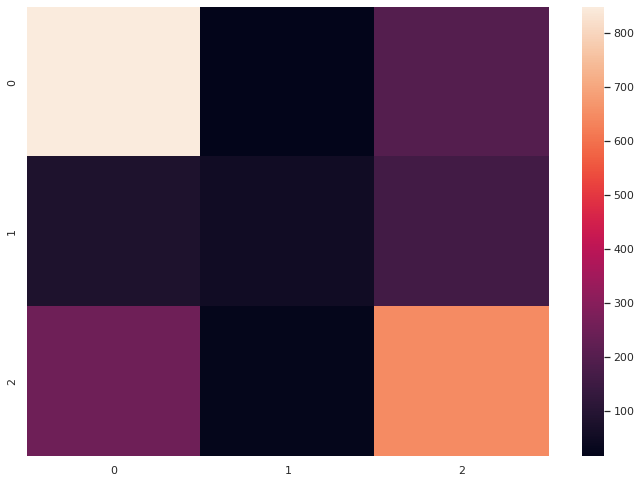

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
results = confusion_matrix(validation_label, prediction)
ax = sns.heatmap(results)